In [124]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

df = sns.load_dataset("titanic")
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [126]:
print("Пропущенные значения до обработки:\n")
df.isna().sum()

Пропущенные значения до обработки:



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

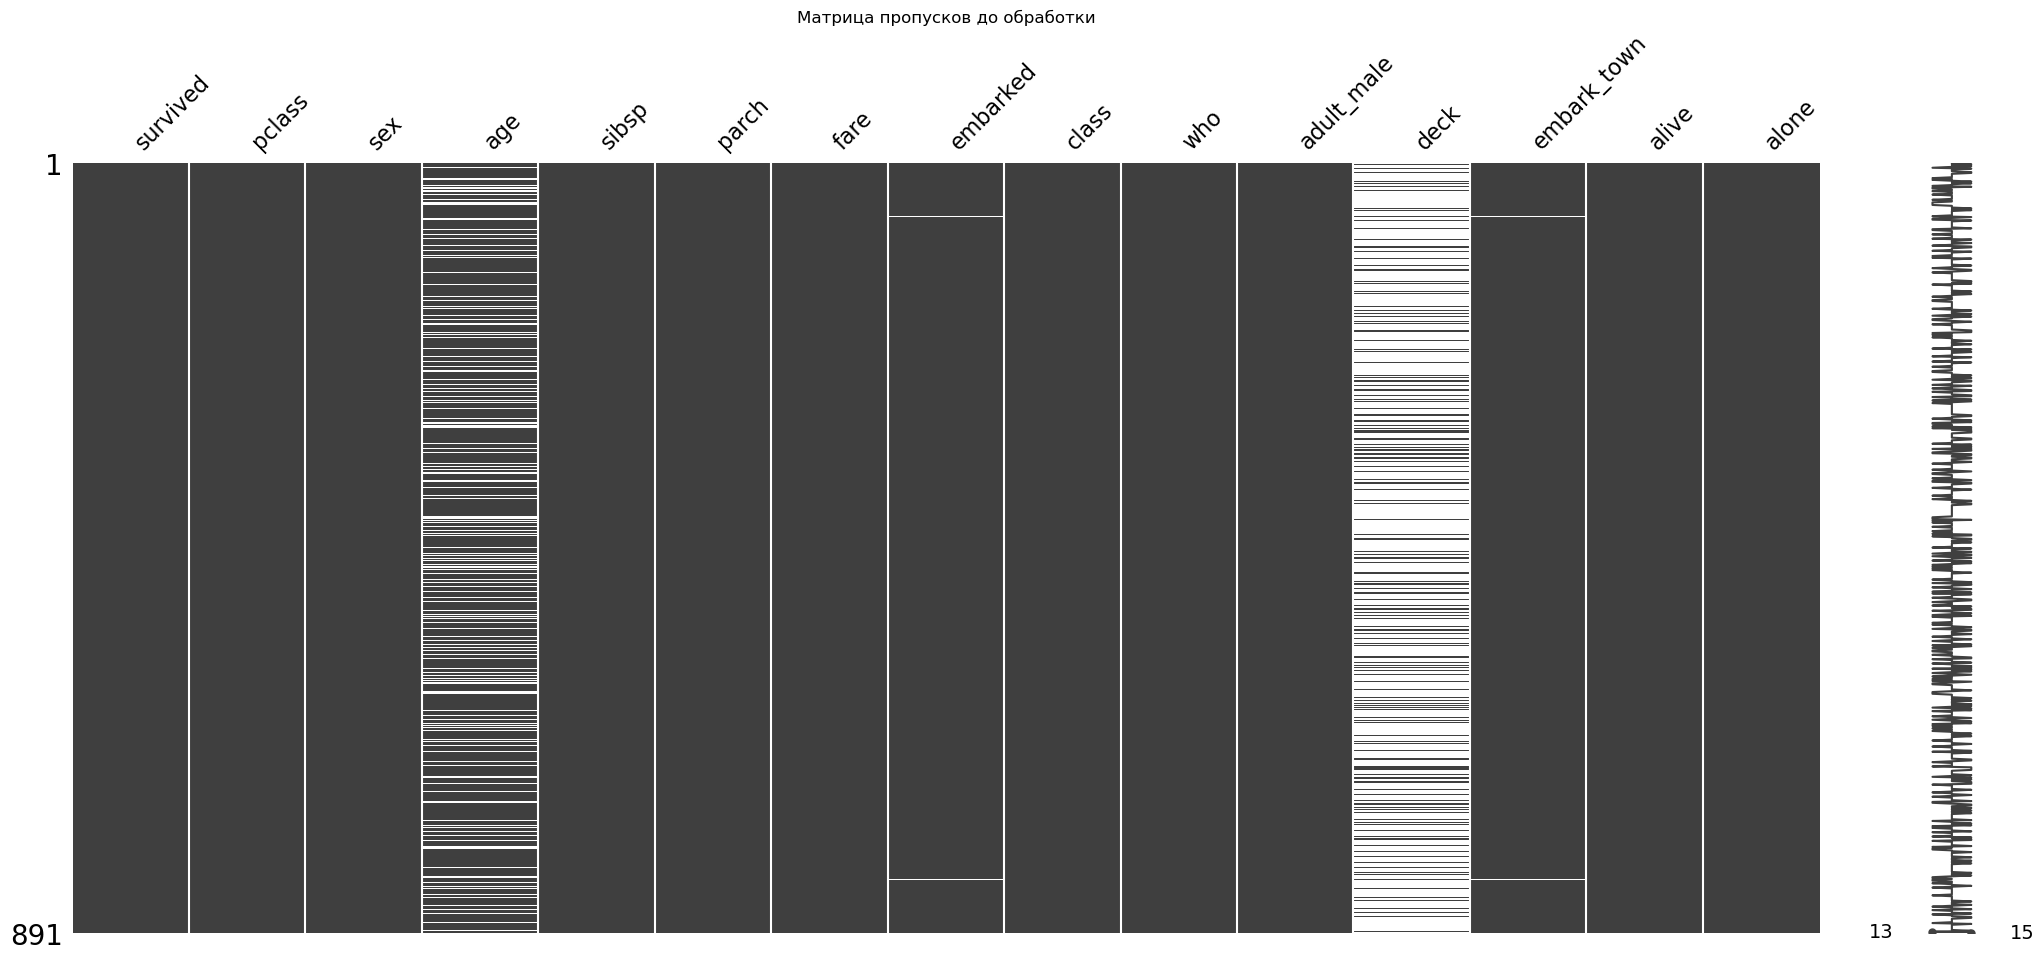

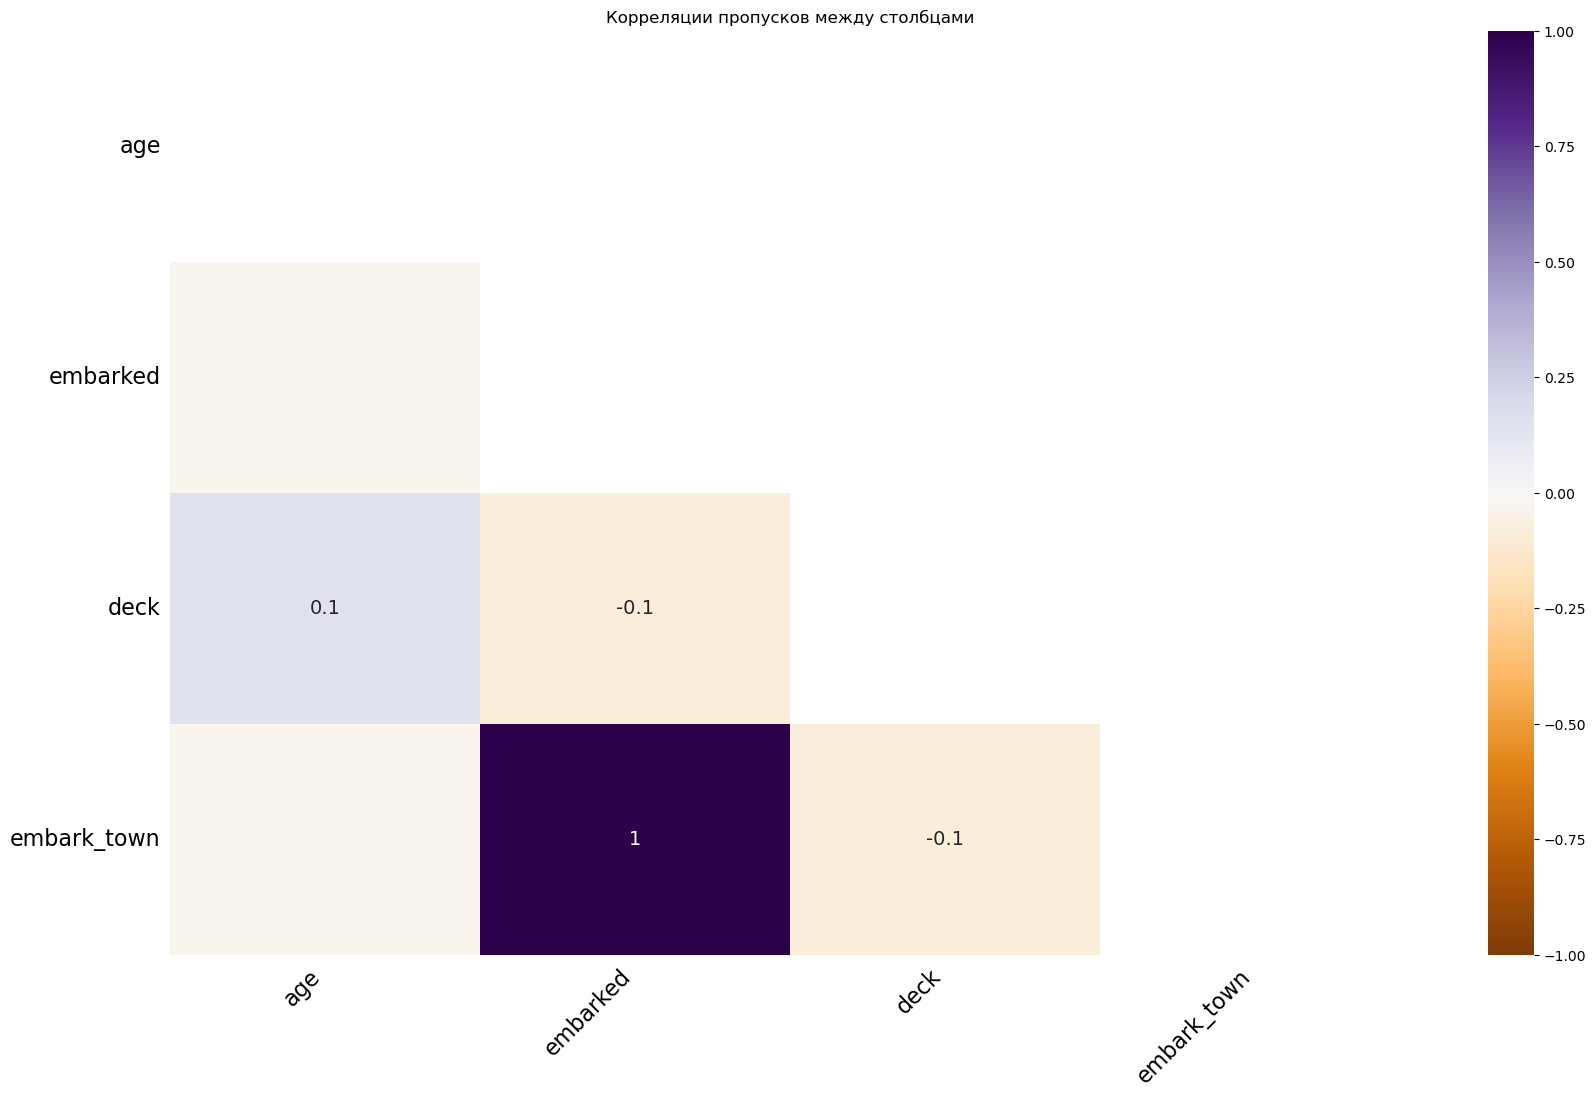

In [128]:
msno.matrix(df)
plt.title("Матрица пропусков до обработки")
plt.show()


msno.heatmap(df, cmap='PuOr')
plt.title("Корреляции пропусков между столбцами")
plt.show()

In [130]:
print("\nИнформация о данных до обработки:\n")
df.info()


Информация о данных до обработки:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [132]:
imputer_age = SimpleImputer(strategy='mean')
df['age'] = imputer_age.fit_transform(df[['age']]).ravel()

imputer_embarked = SimpleImputer(strategy='most_frequent')
df['embark_town'] = imputer_embarked.fit_transform(df[['embark_town']]).ravel()
df['embarked'] = imputer_embarked.fit_transform(df[['embarked']]).ravel()
df.drop(columns='deck', inplace=True)

print("\nПропущенные значения после обработки:\n")
df.isna().sum()


Пропущенные значения после обработки:



survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [98]:
print("\nИнформация о данных после обработки:\n")
df.info()


Информация о данных после обработки:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


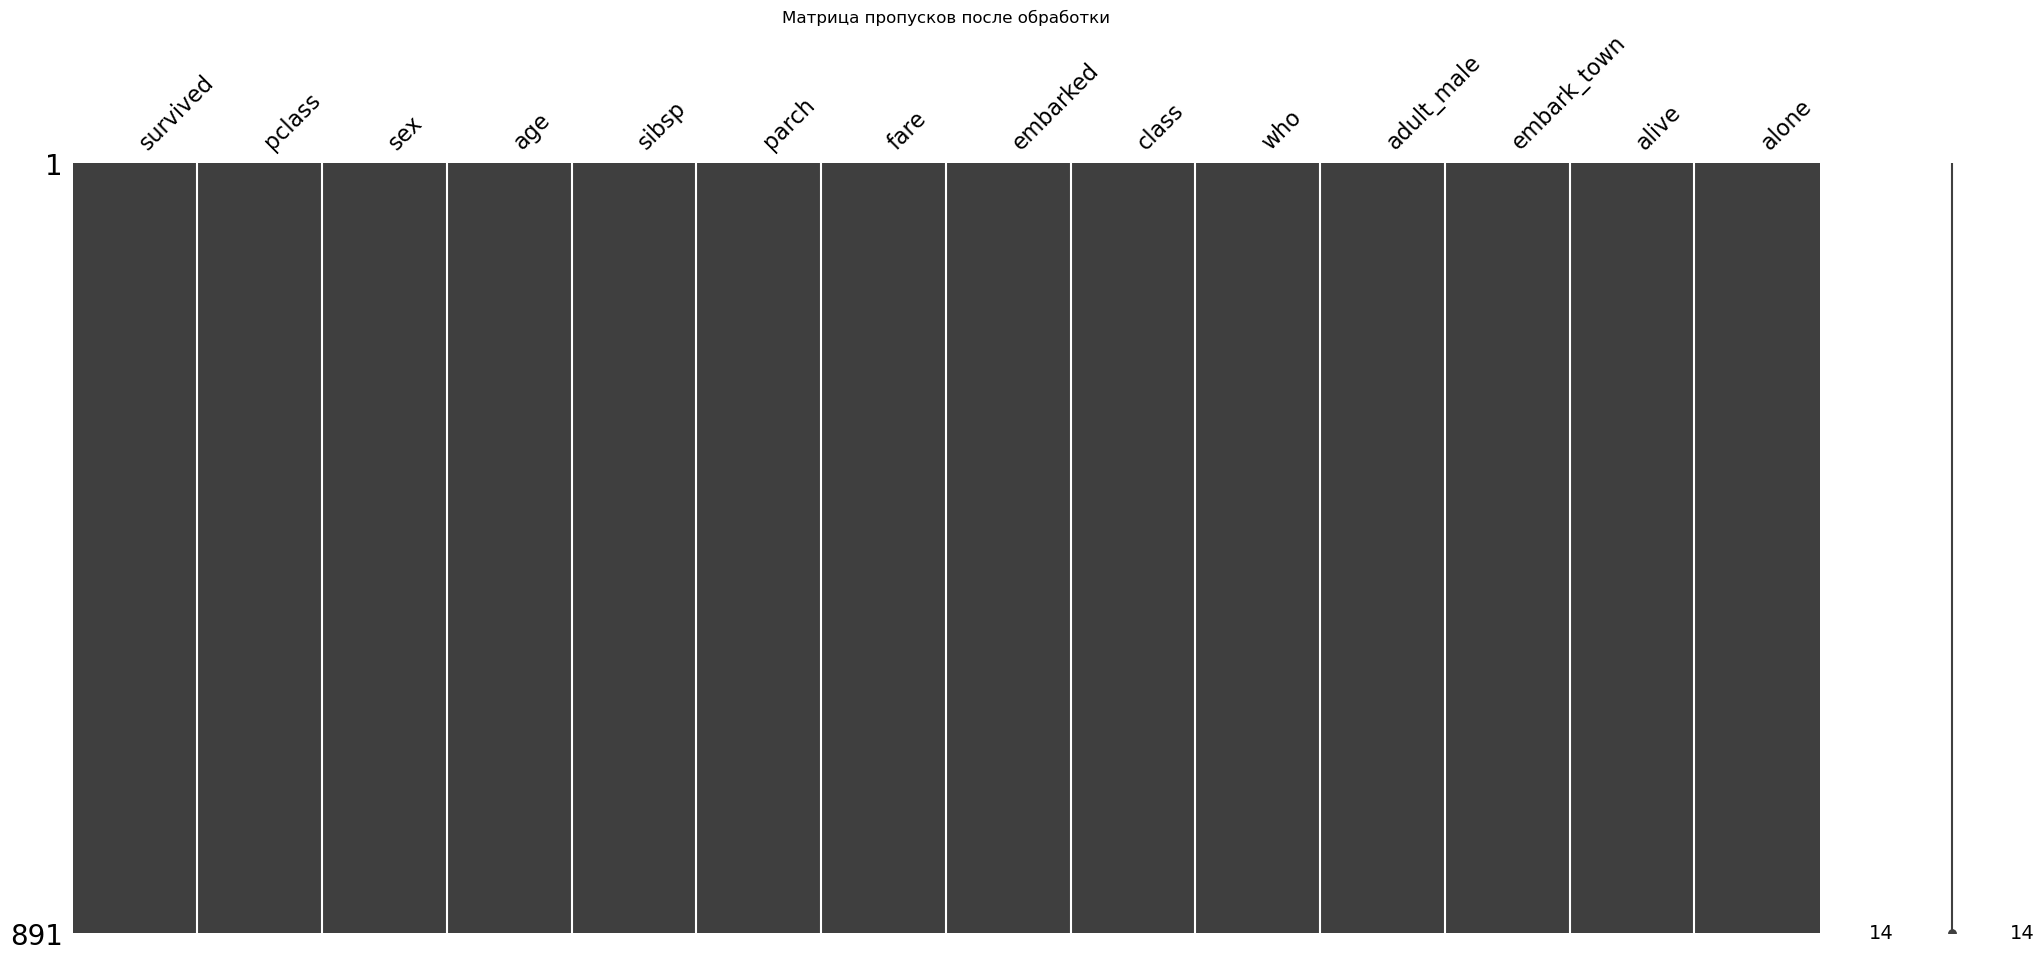

In [134]:
msno.matrix(df)
plt.title("Матрица пропусков после обработки")
plt.show()

In [136]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

df = sns.load_dataset("penguins")
display(df.head())


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


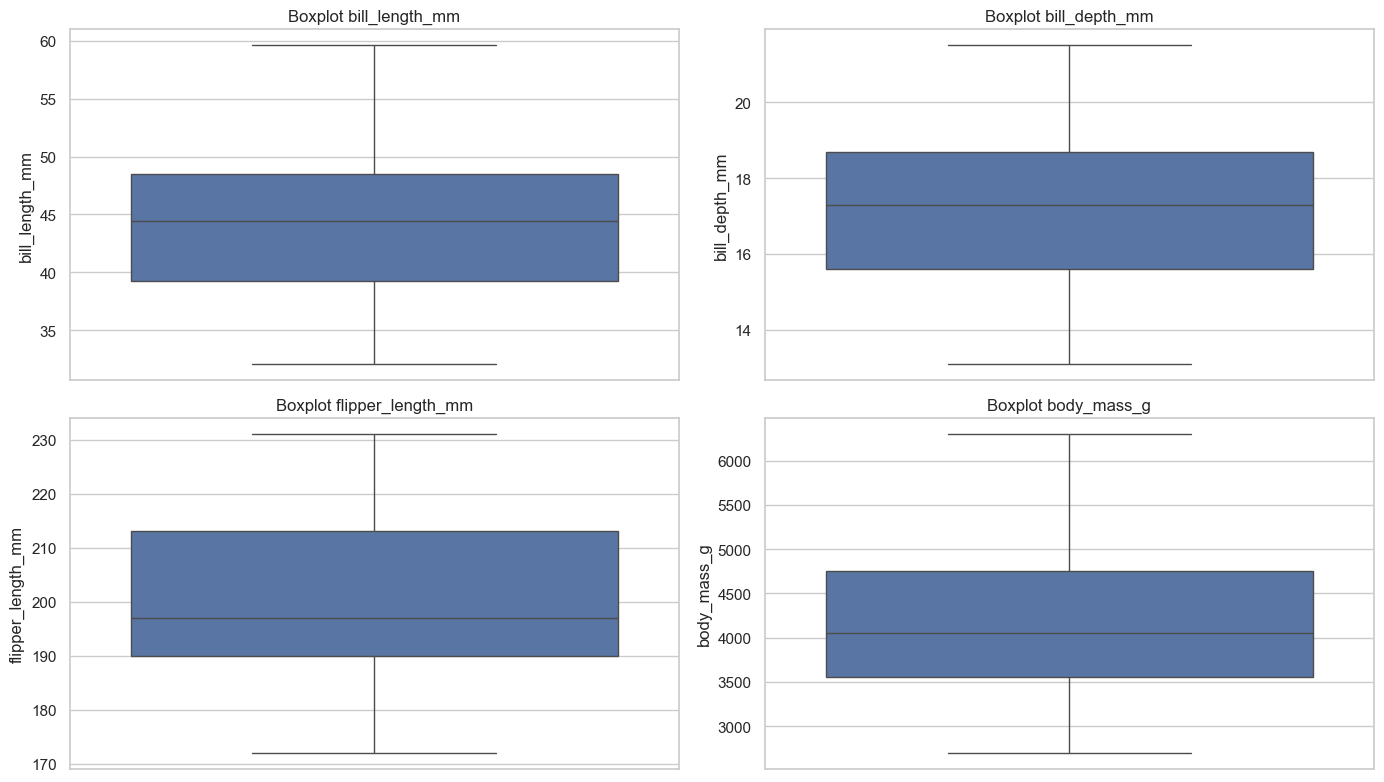

In [134]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


plt.figure(figsize=(14, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

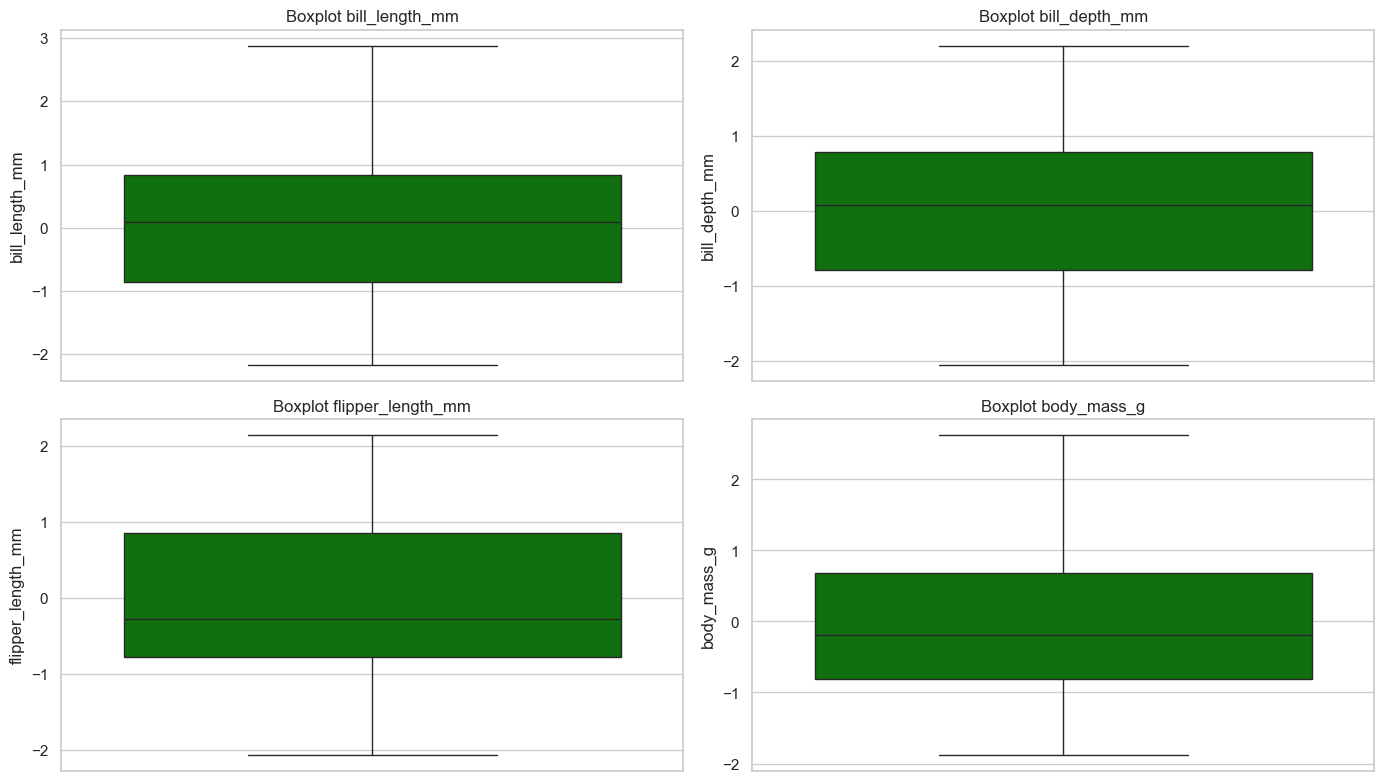

In [221]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


plt.figure(figsize=(14, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=col, color='green')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [223]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Размер до удаления выбросов:", df.shape)

df_filtered = df.copy()
for col in features:
    df_filtered = remove_outliers_iqr(df_filtered, col)

print("Размер после удаления выбросов:", df_filtered.shape)

Размер до удаления выбросов: (342, 7)
Размер после удаления выбросов: (342, 7)


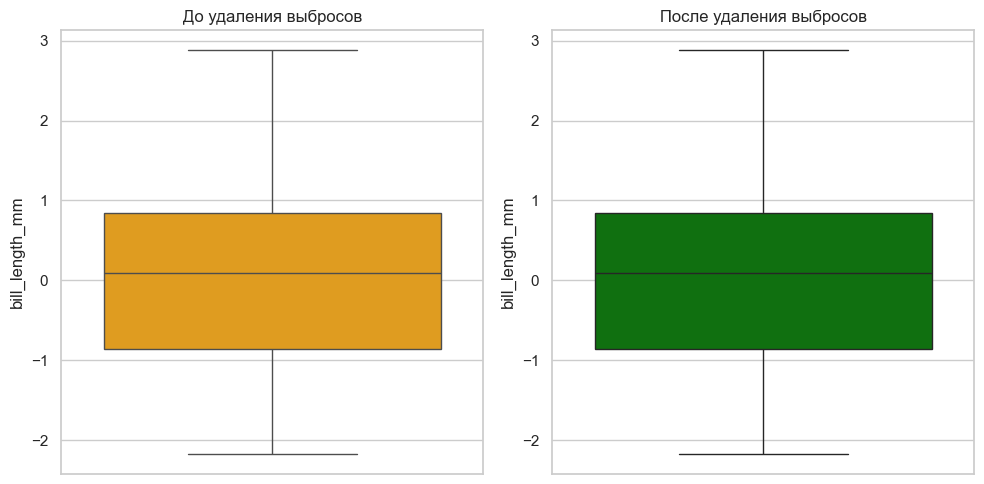

In [225]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='bill_length_mm', color='orange')
plt.title("До удаления выбросов")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, y='bill_length_mm', color='green')
plt.title("После удаления выбросов")

plt.tight_layout()
plt.show()

In [227]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)


In [229]:
df = data.frame
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [231]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_standardized = df.copy()
df_standardized[df.columns] = standard_scaler.fit_transform(df)

display(df_standardized.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


In [233]:
from sklearn.preprocessing import  MinMaxScaler

minmax_scaler = MinMaxScaler()

df_minmax = df.copy()
df_minmax[df.columns] = minmax_scaler.fit_transform(df)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


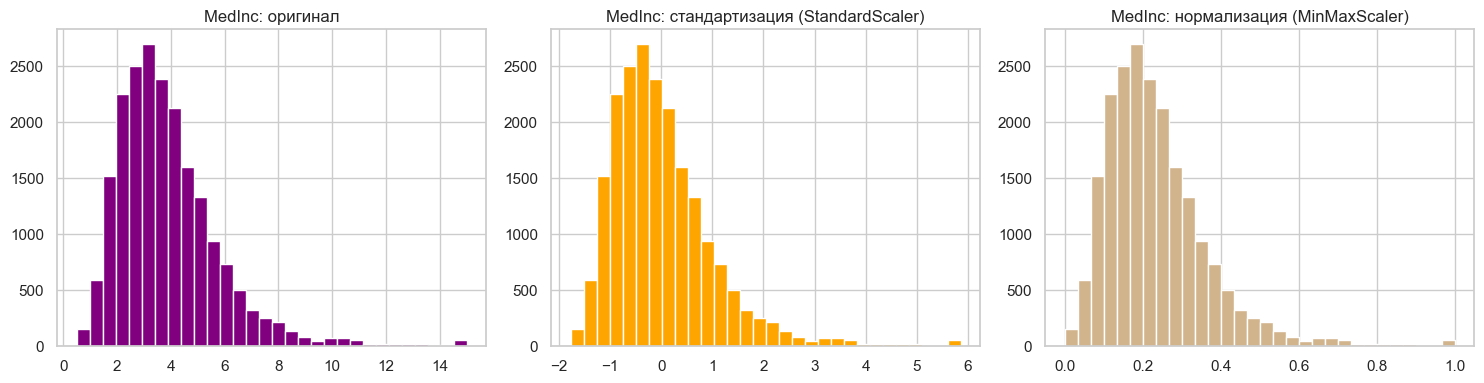

In [235]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))


plt.subplot(1, 3, 1)
plt.hist(df['MedInc'], bins=30, color='purple')
plt.title('MedInc: оригинал')


plt.subplot(1, 3, 2)
plt.hist(df_standardized['MedInc'], bins=30, color='orange')
plt.title('MedInc: стандартизация (StandardScaler)')


plt.subplot(1, 3, 3)
plt.hist(df_minmax['MedInc'], bins=30, color='tan')
plt.title('MedInc: нормализация (MinMaxScaler)')

plt.tight_layout()
plt.show()

In [237]:
from sklearn.datasets import fetch_openml
import pandas as pd


data = fetch_openml("adult", version=2, as_frame=True)
df = data.frame


df = data.data[['education', 'marital-status', 'occupation']].copy()

df['income'] = data.target

print("До кодирования:")
display(df.head())

До кодирования:


,education,marital-status,occupation,income
0,11th,Never-married,Machine-op-inspct,<=50K
1,HS-grad,Married-civ-spouse,Farming-fishing,<=50K
2,Assoc-acdm,Married-civ-spouse,Protective-serv,>50K
3,Some-college,Married-civ-spouse,Machine-op-inspct,>50K
4,Some-college,Never-married,NaN,<=50K


In [239]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['education_encoded'] = le.fit_transform(df['education'])

display(df.head())

,education,marital-status,occupation,income,education_encoded
0,11th,Never-married,Machine-op-inspct,<=50K,1
1,HS-grad,Married-civ-spouse,Farming-fishing,<=50K,11
2,Assoc-acdm,Married-civ-spouse,Protective-serv,>50K,7
3,Some-college,Married-civ-spouse,Machine-op-inspct,>50K,15
4,Some-college,Never-married,NaN,<=50K,15


In [241]:
df_encoded = pd.get_dummies(df, columns=['marital-status', 'occupation'], drop_first=True)

display(df_encoded.head())

,education,income,education_encoded,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,11th,<=50K,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,HS-grad,<=50K,11,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Assoc-acdm,>50K,7,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Some-college,>50K,15,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,Some-college,<=50K,15,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [243]:
display("Размер до кодирования:", df.shape)
display("Размер после кодирования:", df_encoded.shape)

'Размер до кодирования:'

(48842, 5)

'Размер после кодирования:'

(48842, 22)

In [245]:
marital_cols = [col for col in df_encoded.columns if col.startswith('marital-status_')]
occupation_cols = [col for col in df_encoded.columns if col.startswith('occupation_')]

display("Количество one-hot колонок для marital-status:", len(marital_cols))
display("Количество one-hot колонок для occupation:", len(occupation_cols))

display("Примеры столбцов marital-status:", marital_cols[:3])
display("Примеры столбцов occupation:", occupation_cols[:3])

'Количество one-hot колонок для marital-status:'

6

'Количество one-hot колонок для occupation:'

13

'Примеры столбцов marital-status:'

['marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent']

'Примеры столбцов occupation:'

['occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial']

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


%matplotlib inline
sns.set(style="whitegrid")

In [249]:
df = pd.read_csv('heart.csv')


display(df.head())


df.info()


df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [251]:
display("Пропущенные значения по колонкам:")
df.isnull().sum()

'Пропущенные значения по колонкам:'

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

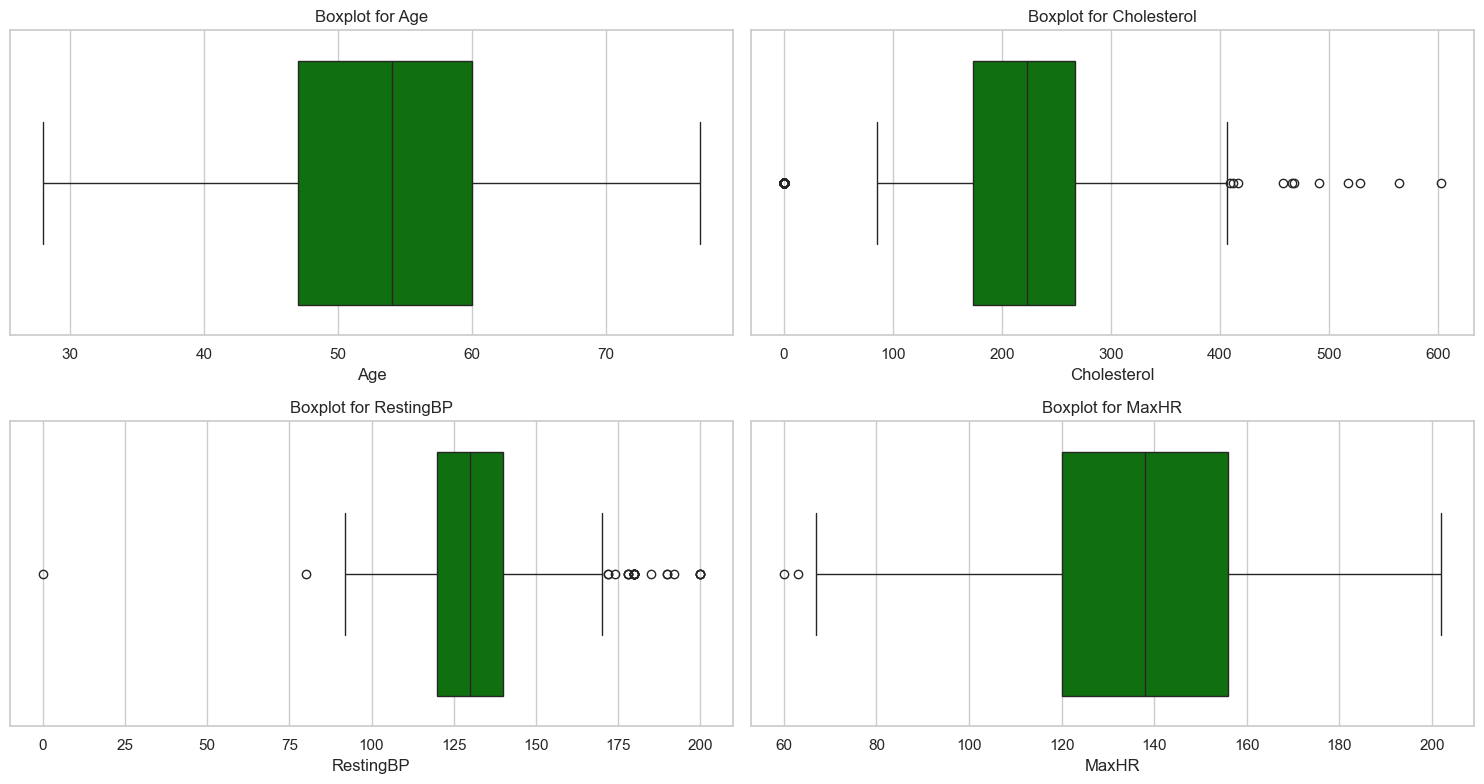

In [253]:
def plot_boxplots(df, features):
    plt.figure(figsize=(15, 8))
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=df[feature], color='green')
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

features_to_check = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']
plot_boxplots(df, features_to_check)

'Размер датасета до очистки: (918, 12)'

'Размер датасета после очистки: (715, 12)'

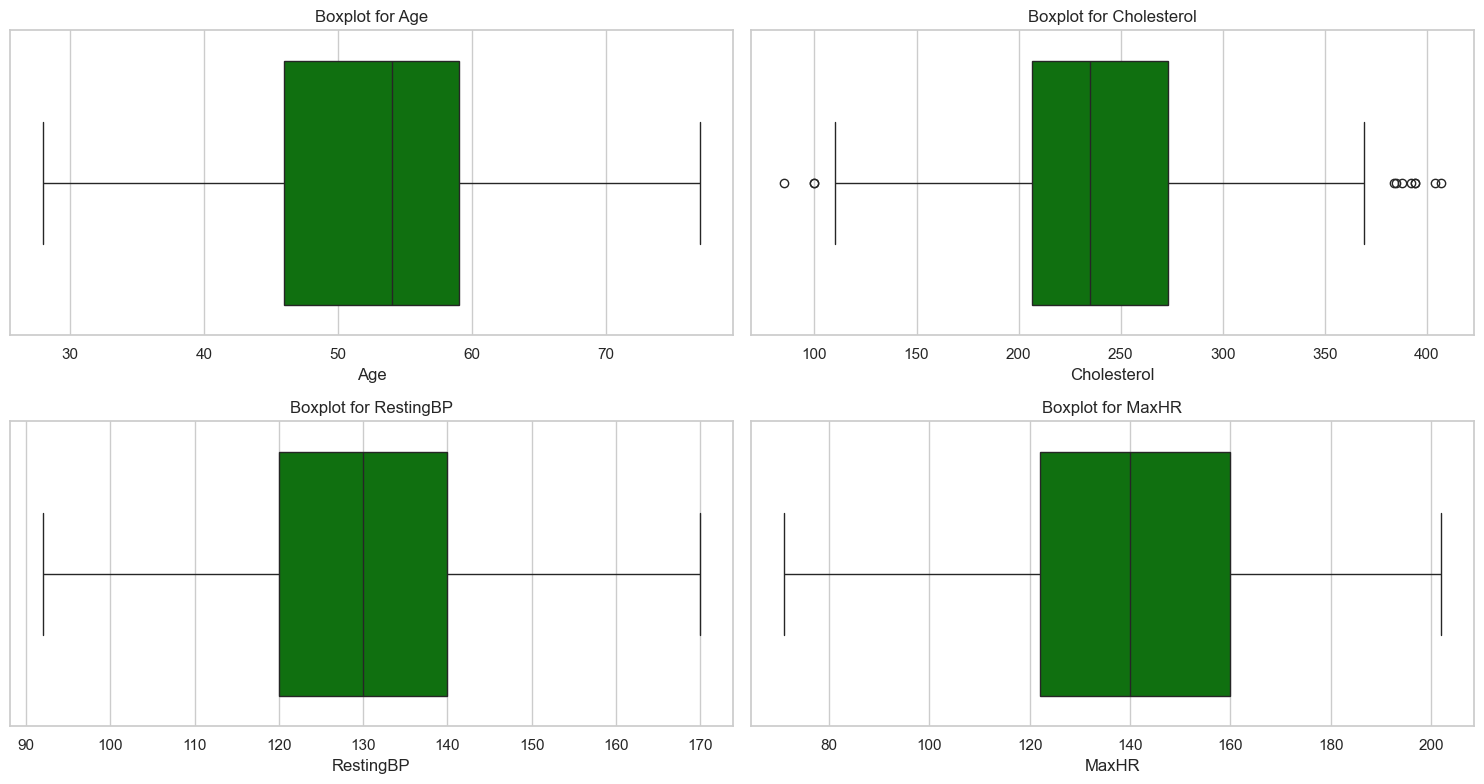

In [255]:
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

df_clean = remove_outliers_iqr(df, features_to_check)


display(f"Размер датасета до очистки: {df.shape}")
display(f"Размер датасета после очистки: {df_clean.shape}")


plot_boxplots(df_clean, features_to_check)

In [153]:
num_features = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']

scaler = StandardScaler()
df_clean[num_features] = scaler.fit_transform(df_clean[num_features])


df_clean[num_features].describe()

,Age,Cholesterol,RestingBP,MaxHR
count,7.150000e+02,7.150000e+02,7.150000e+02,7.150000e+02
mean,-3.180051e-16,-1.714246e-16,7.478090e-16,2.981298e-16
std,1.000700e+00,1.000700e+00,1.000700e+00,1.000700e+00
min,-2.601504e+00,-3.047572e+00,-2.574934e+00,-2.849613e+00
25%,-7.149116e-01,-6.594445e-01,-7.583156e-01,-7.558124e-01
50%,1.235740e-01,-9.926649e-02,-1.095234e-01,-1.682390e-02
75%,6.476275e-01,6.476376e-01,5.392688e-01,8.042744e-01
max,2.534220e+00,3.281457e+00,2.485645e+00,2.528581e+00


In [257]:
cat_features = ['Sex', 'ChestPainType', 'ExerciseAngina', 'RestingECG']
for col in cat_features:
    display(f"{col} unique values: {df_clean[col].unique()}")
    
df_clean['Sex'] = df_clean['Sex'].map({'M':1, 'F':0}) if df_clean['Sex'].dtype == object else df_clean['Sex']
df_clean['ExerciseAngina'] = df_clean['ExerciseAngina'].map({'Y':1, 'N':0}) if df_clean['ExerciseAngina'].dtype == object else df_clean['ExerciseAngina']


df_clean = pd.get_dummies(df_clean, columns=['ChestPainType', 'RestingECG'], drop_first=True)


df_clean.head()

"Sex unique values: ['M' 'F']"

"ChestPainType unique values: ['ATA' 'NAP' 'ASY' 'TA']"

"ExerciseAngina unique values: ['N' 'Y']"

"RestingECG unique values: ['Normal' 'ST' 'LVH']"

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,Up,0,True,False,False,True,False
1,49,0,160,180,0,156,0,1.0,Flat,1,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,Up,0,True,False,False,False,True
3,48,0,138,214,0,108,1,1.5,Flat,1,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,Up,0,False,True,False,True,False


# Индивидуальное задание

In [259]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('penguins')

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


None

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

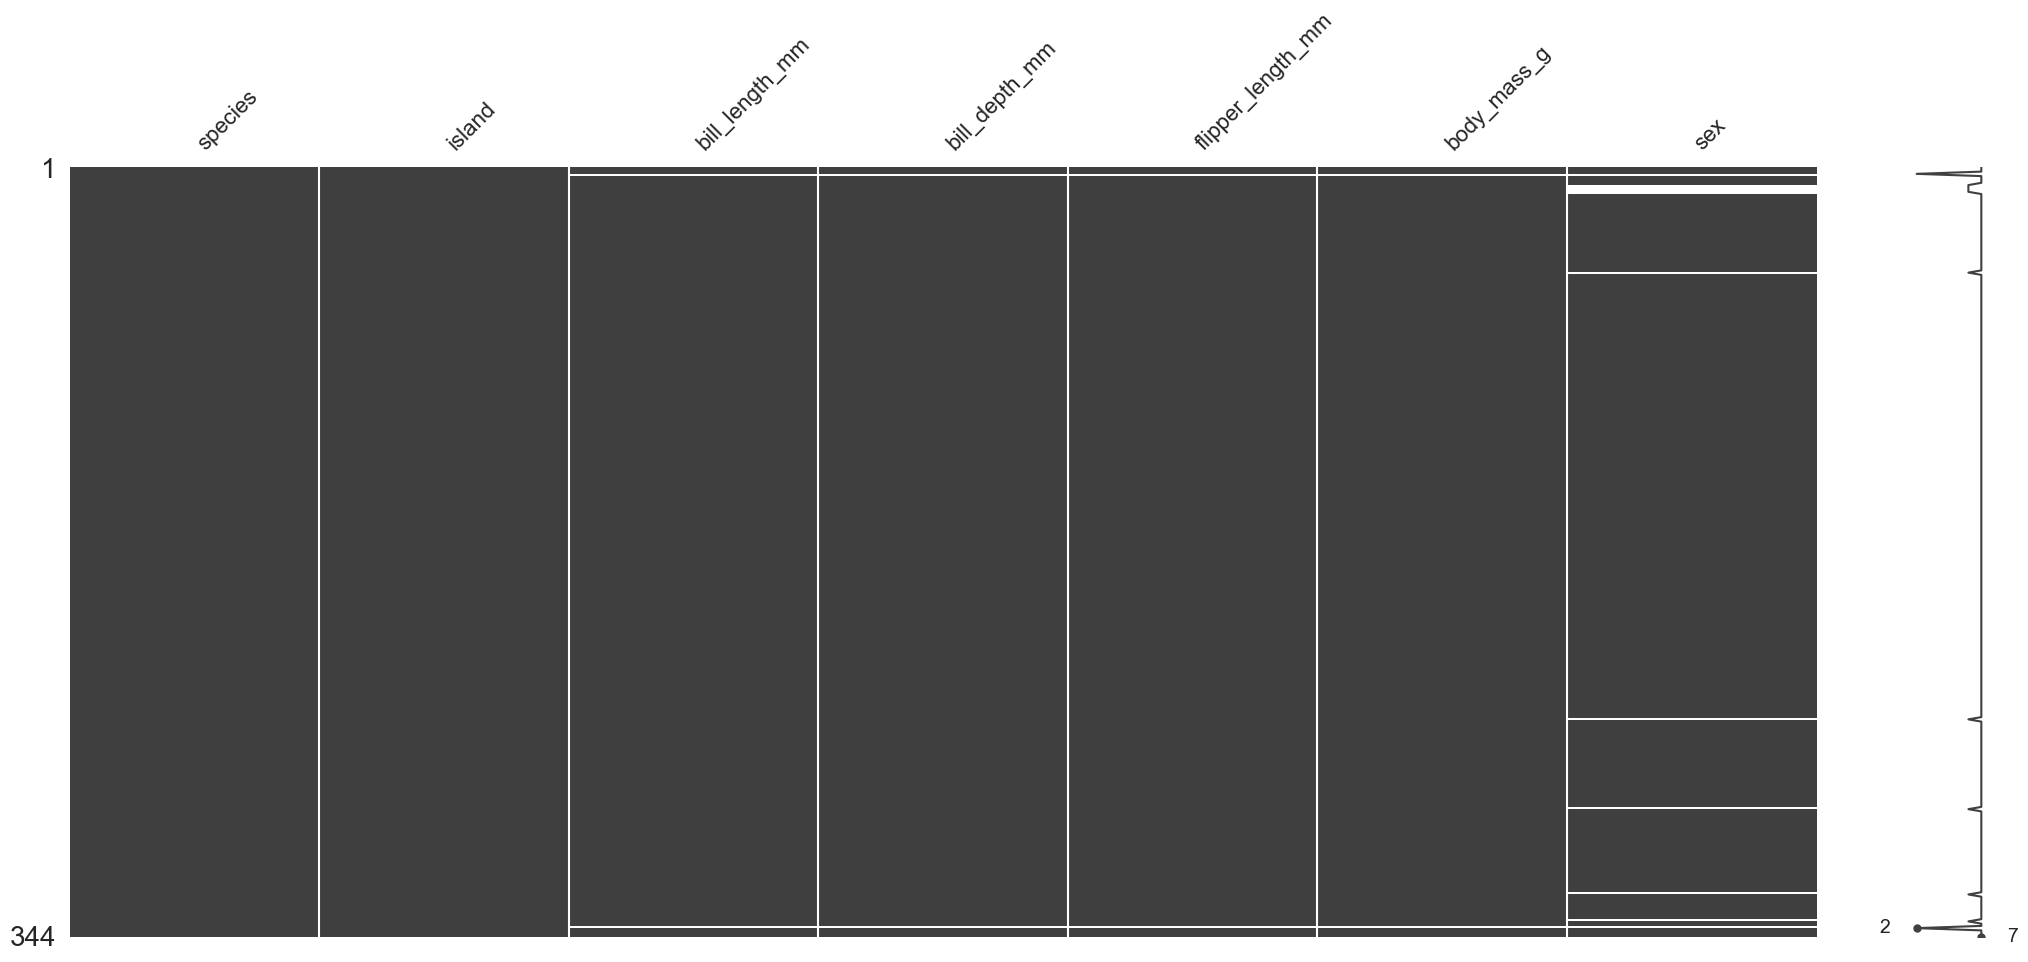

In [261]:
display(df.isnull().sum())

import missingno as msno
msno.matrix(df)
plt.show()

df['sex'] = df['sex'].fillna('unknown')
df = df.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

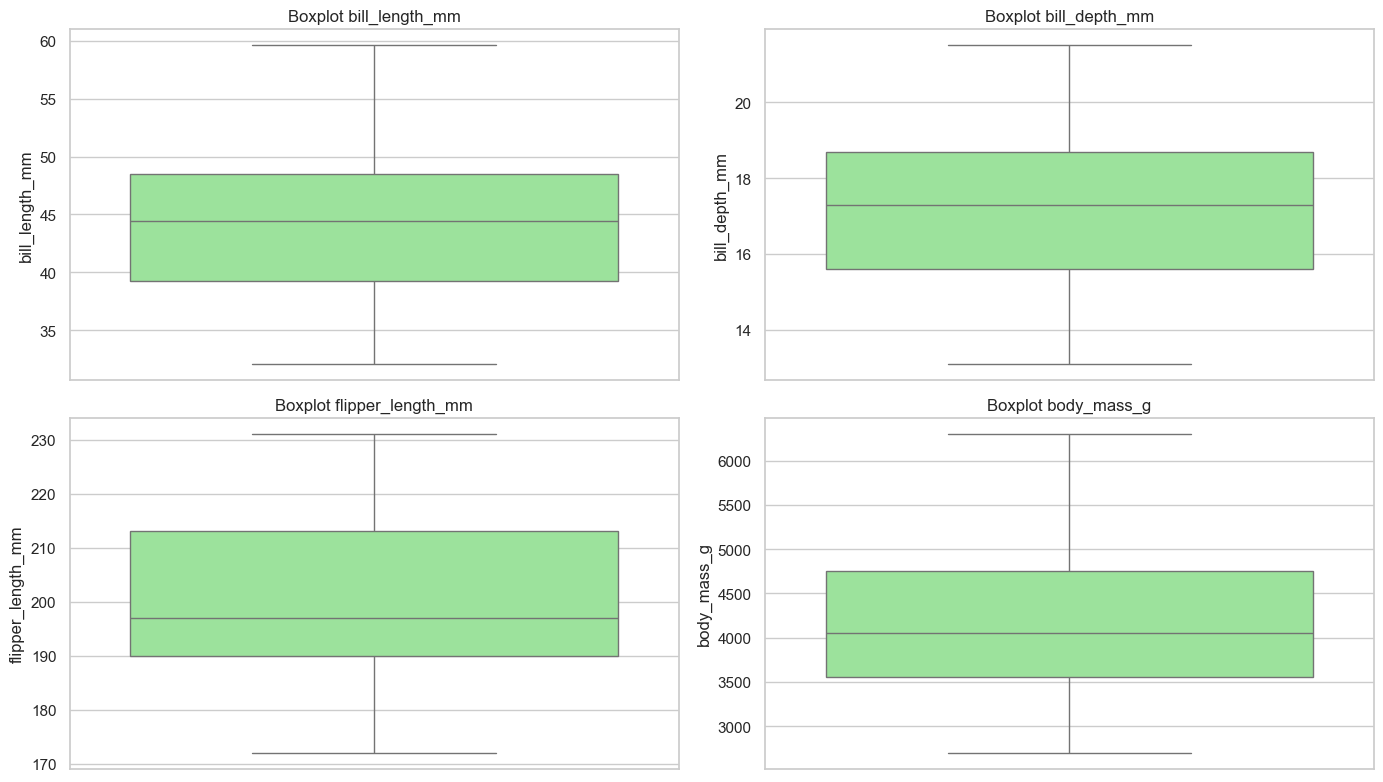

In [263]:
numerical = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

from scipy import stats
df = df[(np.abs(stats.zscore(df[numerical])) < 3).all(axis=1)] 

In [265]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
display(df[numerical].describe())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,1.662088e-16,-1.412775e-15,-8.310441e-16,4.155221e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


In [267]:
from sklearn.preprocessing import LabelEncoder

In [269]:
display(df['species'].unique())
display(df['island'].unique())
display(df['sex'].unique())

df_encoded = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)
display(df_encoded.head())

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

array(['Male', 'Female', 'unknown'], dtype=object)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male,sex_unknown
0,-0.884499,0.785449,-1.418347,-0.564142,False,False,False,True,True,False
1,-0.811126,0.126188,-1.062250,-0.501703,False,False,False,True,False,False
2,-0.664380,0.430462,-0.421277,-1.188532,False,False,False,True,False,False
4,-1.324737,1.089724,-0.563715,-0.938776,False,False,False,True,False,False
5,-0.847812,1.748985,-0.777373,-0.689020,False,False,False,True,True,False


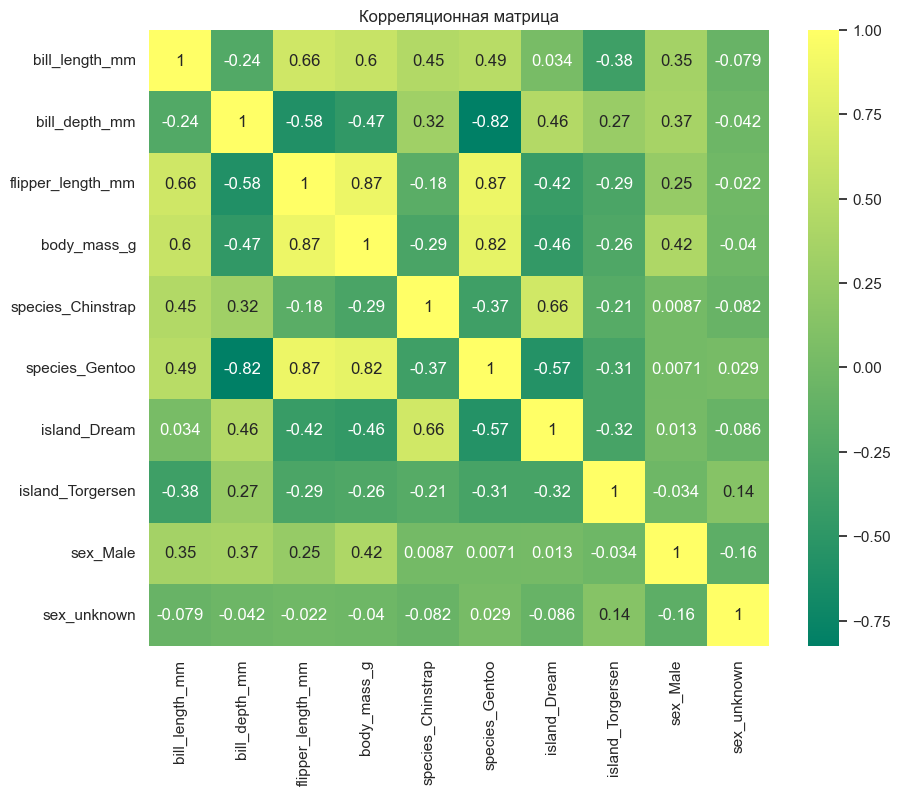

In [271]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='summer', )
plt.title('Корреляционная матрица')
plt.show()

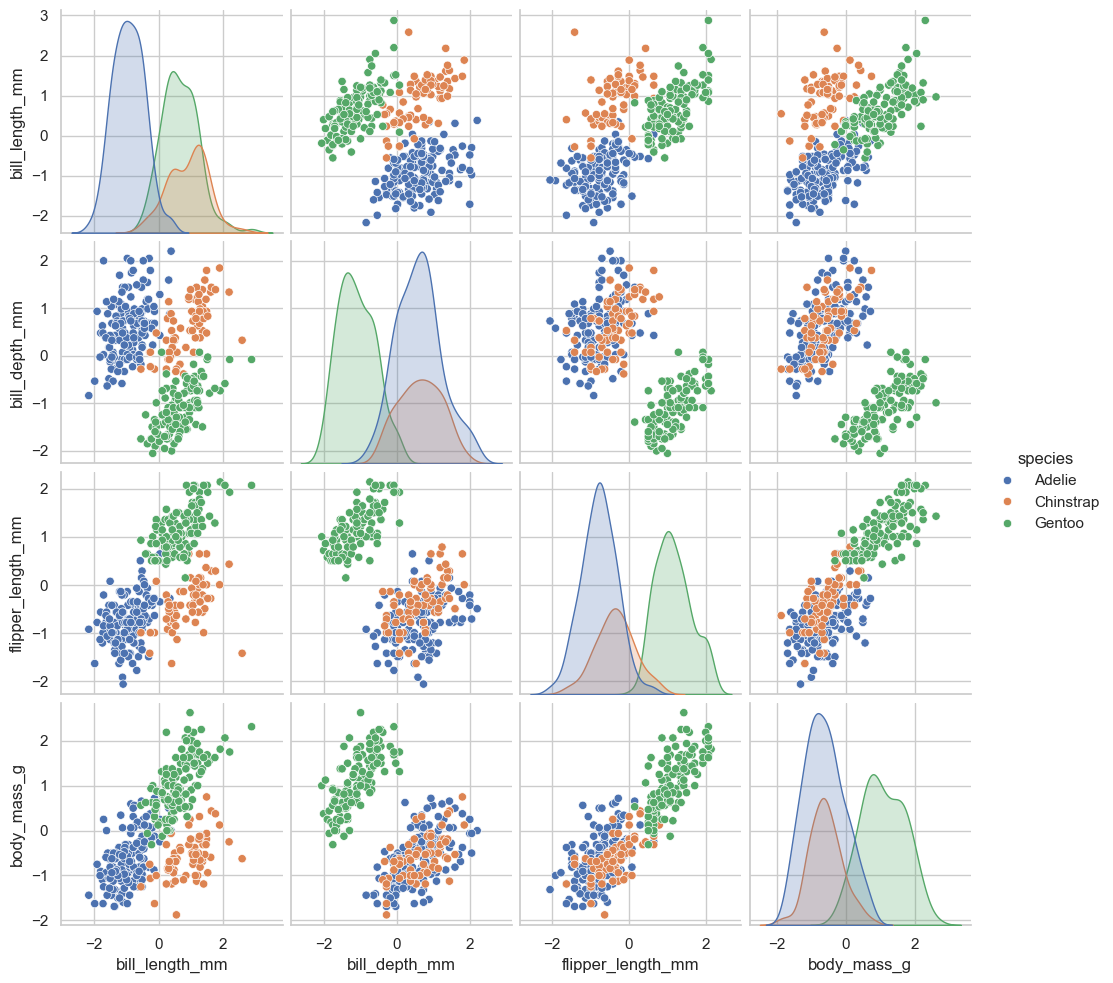

In [273]:
sns.pairplot(df, hue='species')
plt.show()

In [275]:
df_encoded.to_csv('processed_penguins.csv', index=False)
df_encoded.to_parquet('processed_penguins.parquet', index=False)